# **ESB2025** **/ AI Based Shape Representation /** **Hands-On Session**

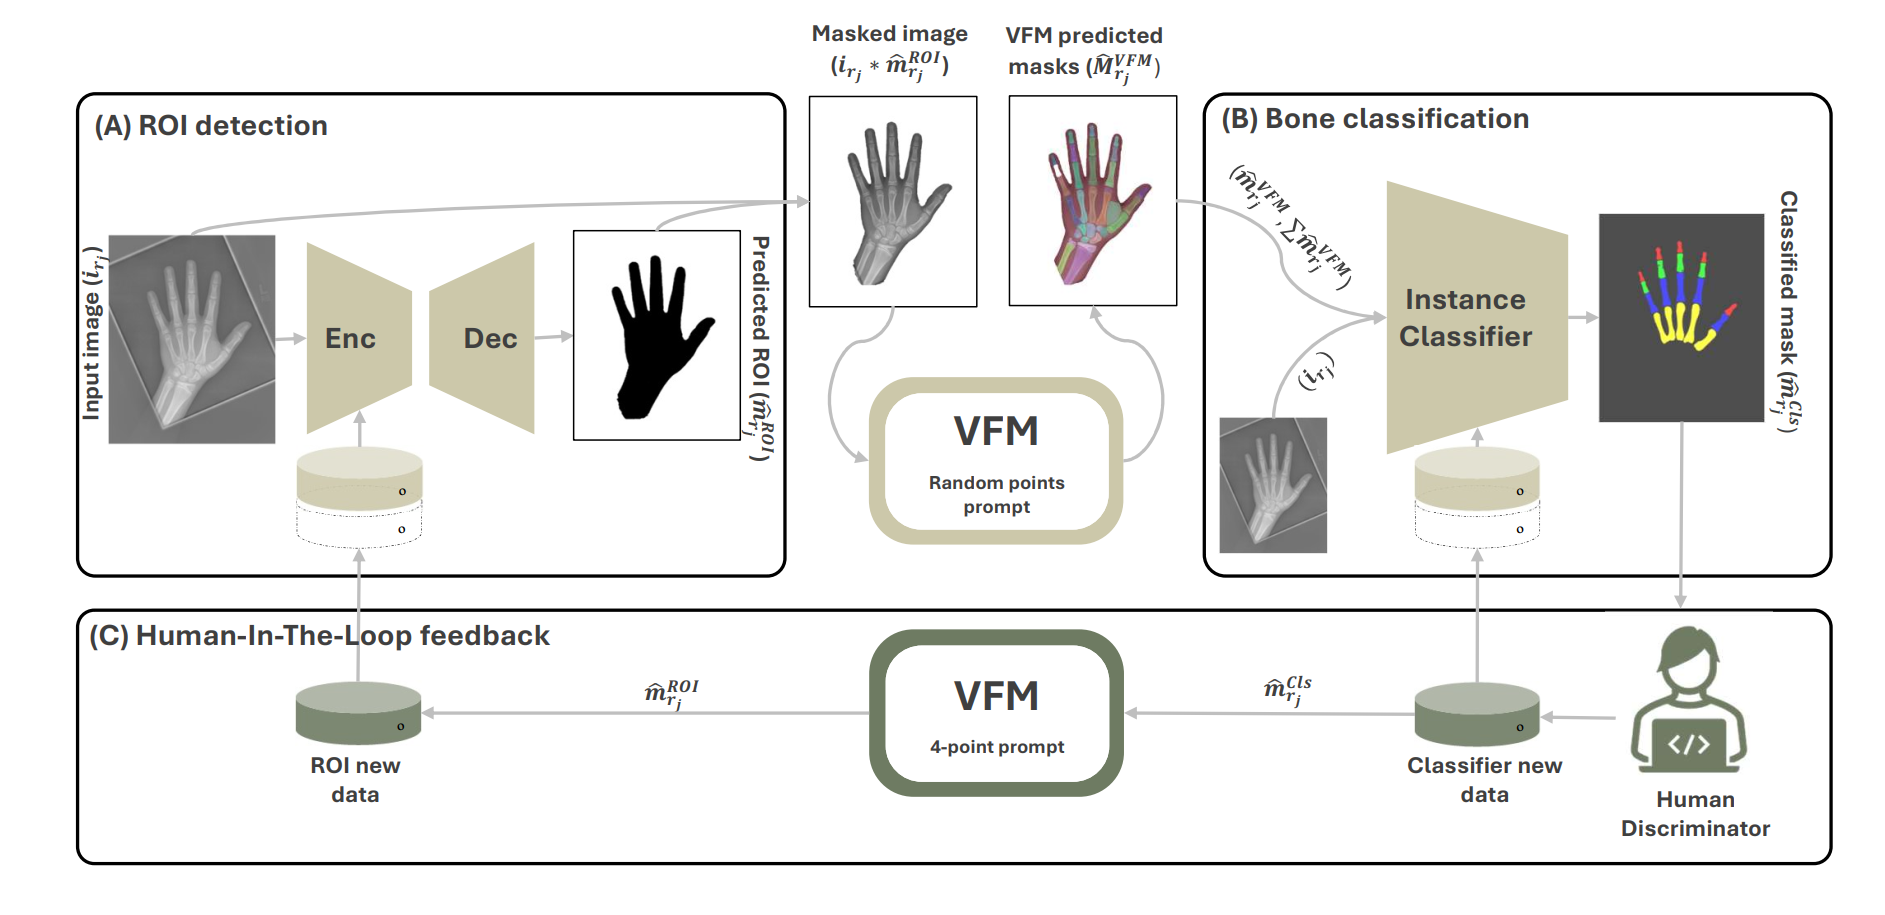

### 1. Clone and installation

In [ ]:
!git clone --branch ESB25_workshop_AI4shp https://github.com/mohofar/PedVision.git

Cloning into 'PedVision'...
remote: Enumerating objects: 737, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 737 (delta 73), reused 63 (delta 40), pack-reused 628 (from 4)
Receiving objects: 100% (737/737), 142.72 MiB | 22.92 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [ ]:
cd PedVision

/content/PedVision


In [ ]:
!pip install segmentation-models-pytorch==0.4.0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### 2. Pedvision Experiments

In [ ]:
''' Step2.1: Prepare the folder structure and download weights'''

!python PedVisionCode/main.py --foldering y
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P PedVisionCode/saved_models
!wget "https://www.dropbox.com/scl/fi/7kzywiswmslrfmlgcp6vo/ROI_model_R11.pth?rlkey=idpqozialittcri90us2hy1vc&st=usq0igej&dl=1" -O PedVisionCode/saved_models/ROI_model_R11.pth
!wget "https://www.dropbox.com/scl/fi/5p9zymm76fnhj95grmq73/CLS_model_R11.pth?rlkey=urzxlrjrsq1du397za8vucpvy&st=n3fktzg7&dl=1" -O PedVisionCode/saved_models/CLS_model_R11.pth

--2025-07-02 09:24:49--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.15, 13.226.210.25, 13.226.210.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘PedVisionCode/saved_models/sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   192MB/s    in 16s     

2025-07-02 09:25:05 (150 MB/s) - ‘PedVisionCode/saved_models/sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]

--2025-07-02 09:25:05--  https://www.dropbox.com/scl/fi/7kzywiswmslrfmlgcp6vo/ROI_model_R11.pth?rlkey=idpqozialittcri90us2hy1vc&st=usq0igej&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting respon

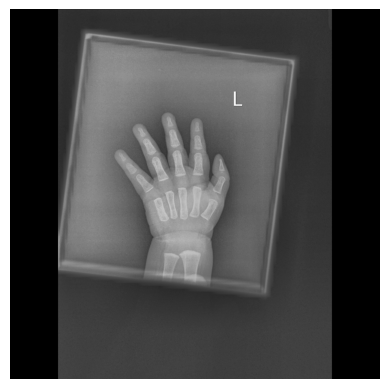

In [ ]:
''' Step2.2: Visualize the input example (if you want)'''

IMAGE_NAME = '1998'
from PedVisionCode.utils import noise_add as vis
vis.vis_image(IMAGE_NAME)

In [ ]:
''' Step2.3: Run the test code'''

!python PedVisionCode/main.py\
--test_model y\
--img_name {IMAGE_NAME}

Testing model...
100% 1/1 [00:25<00:00, 25.11s/it]


./PedVisionCode/test_data/input/1998.jpg
Visualizing masks for: 1998


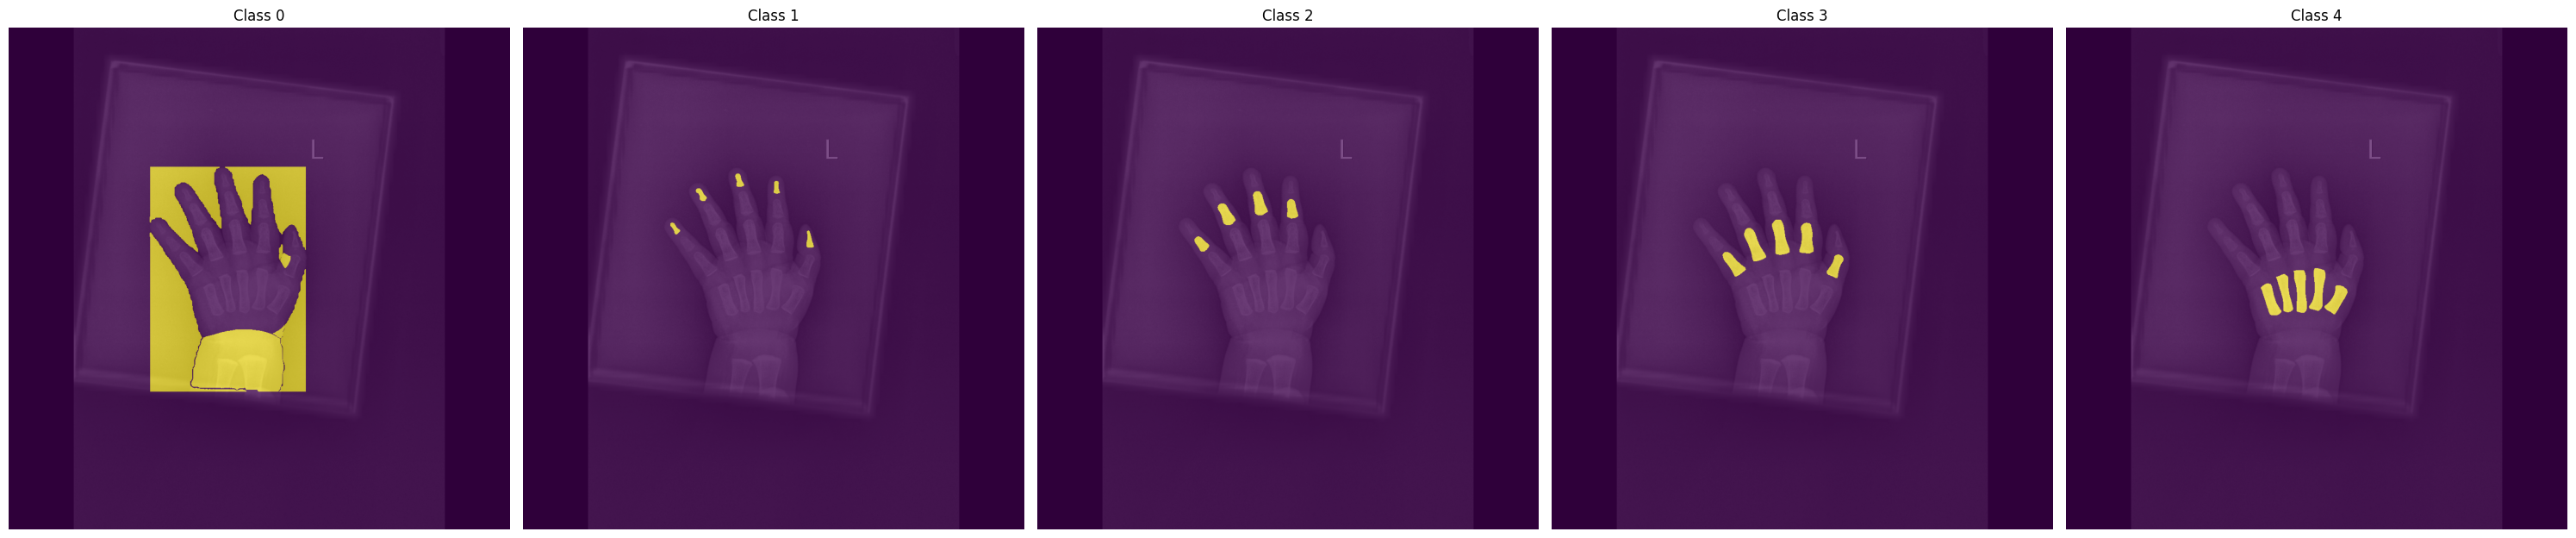

In [ ]:
''' Step2.4: Visalize the predicted masks'''


from PedVisionCode.utils import noise_add as vis

img_path = f'./PedVisionCode/test_data/input/{IMAGE_NAME}.jpg'
print(img_path)
vis.visualize_masks(img_path)

#### Noise Introduction

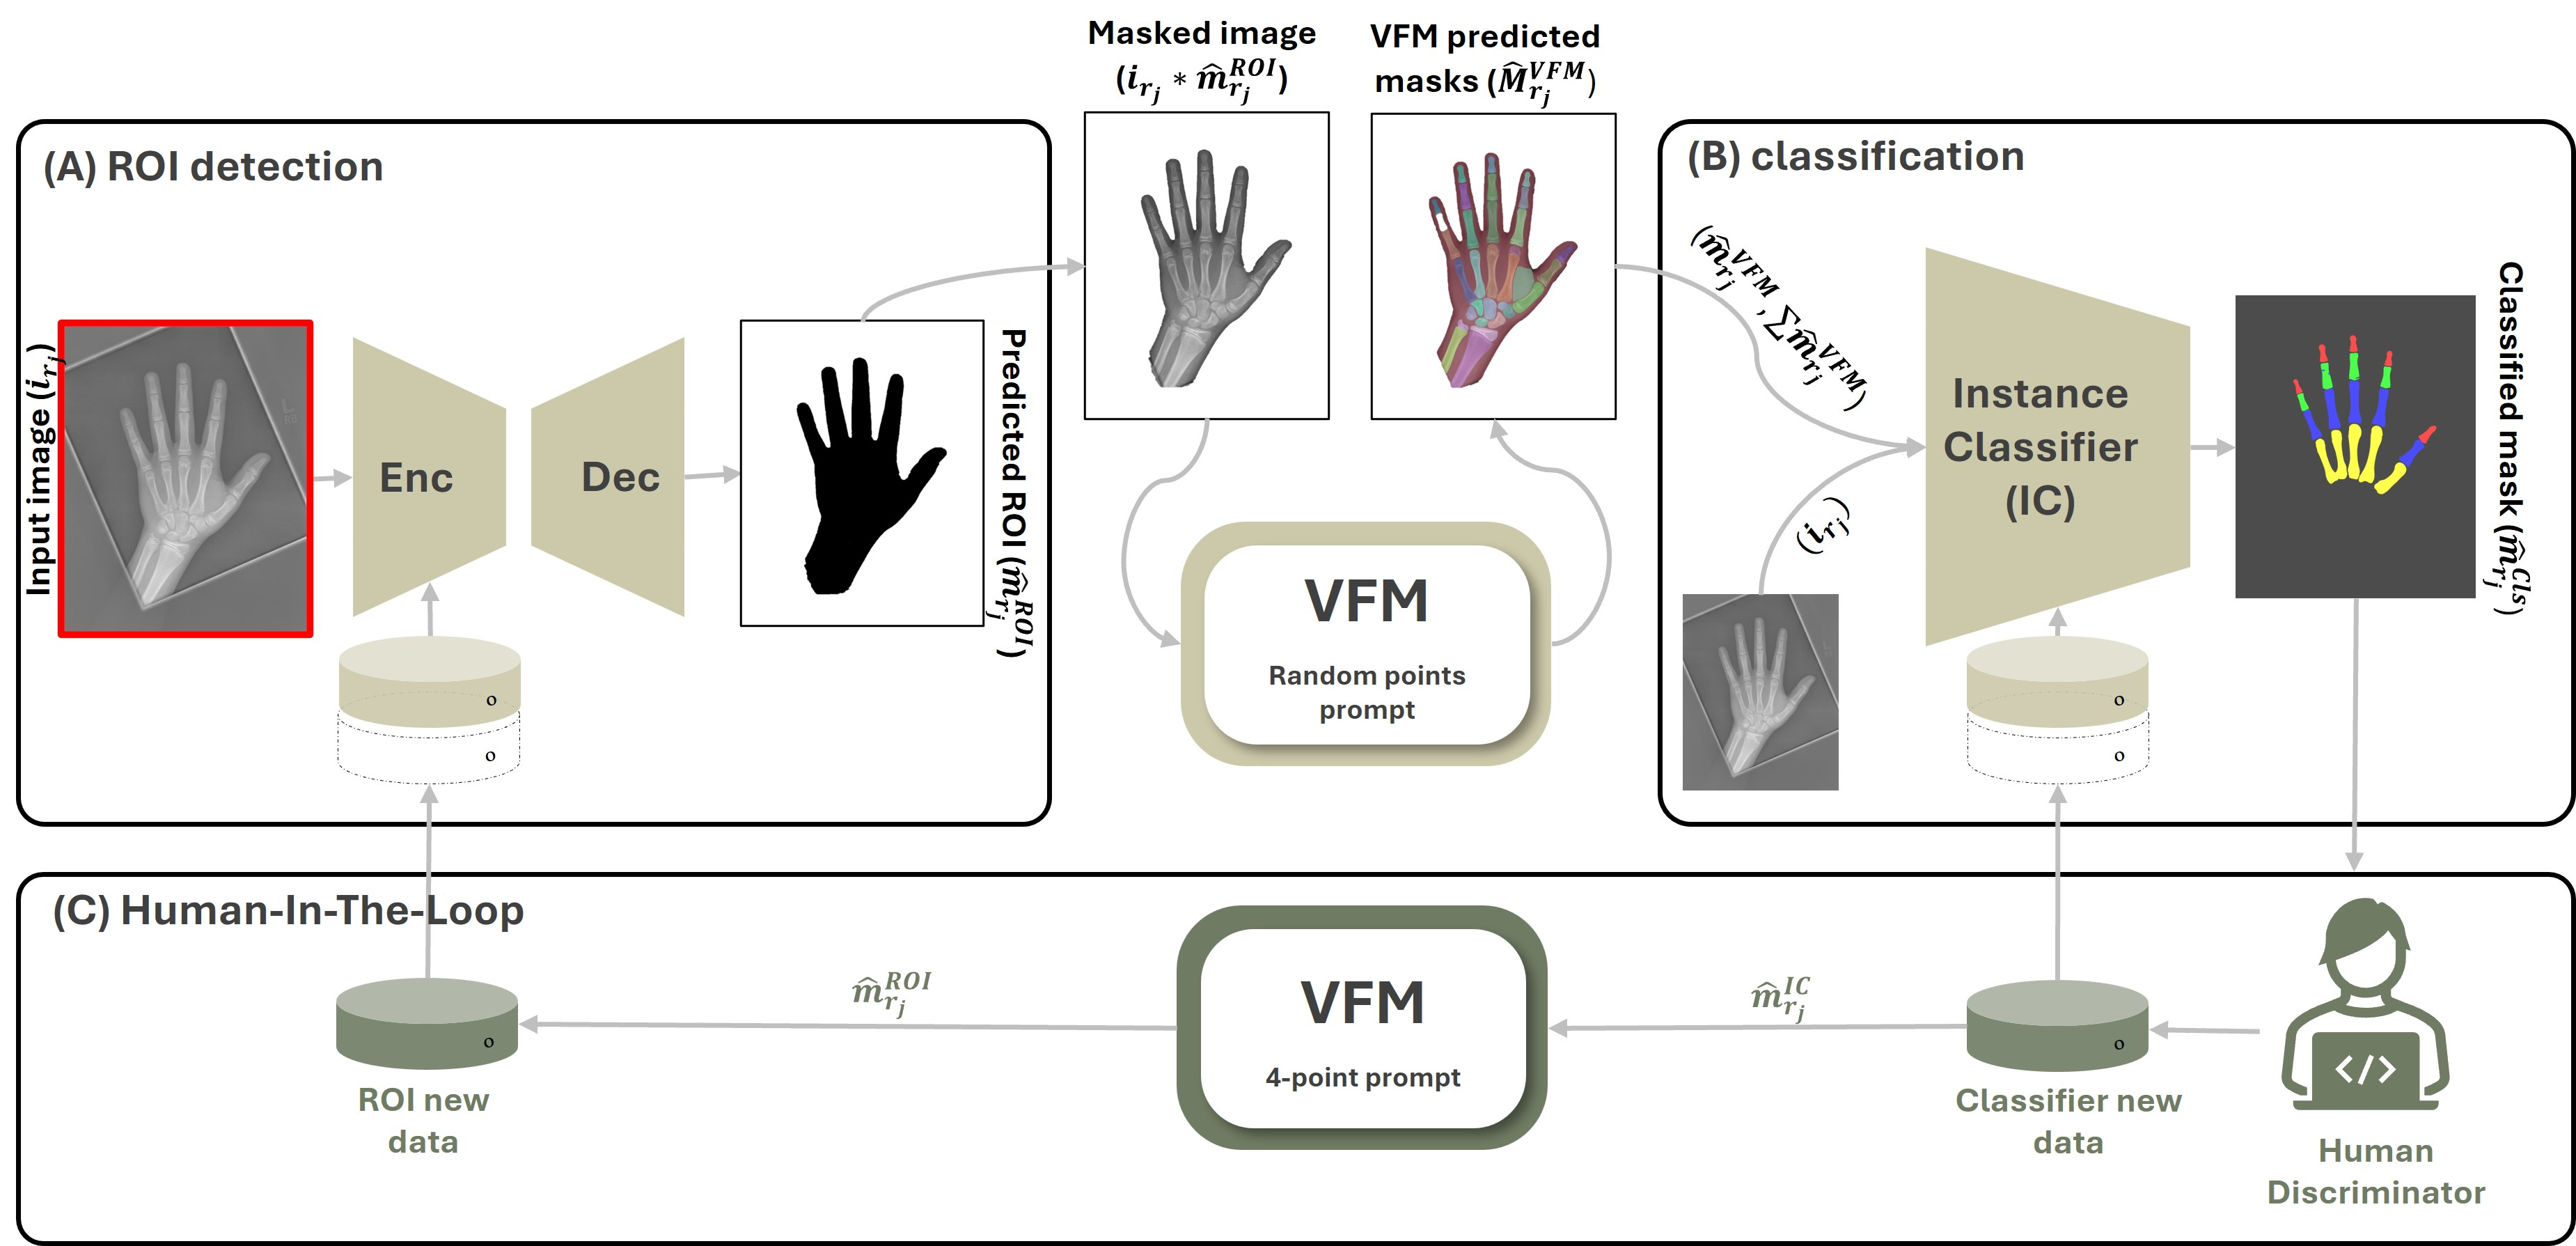

In [ ]:
''' Step2.5: Explore noise and motion effects (if you want)'''

from PedVisionCode.utils import noise_add
import cv2

image1 = cv2.imread(img_path)
# noise_add.show_noise_examples(image1, 'gaussian', [90, 70, 50, 20])
# noise_add.show_noise_examples(image1, 'salt_pepper', 60)
# noise_add.quick_noise_demo(image1, 'motion')
noise_add.compare_all_noise_types(image1, 60)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
''' Step2.6: Save a noisy image by changing type and rate of noise/motion'''

NOISE_TYPE = 'salt_pepper' # "gaussian", "salt_pepper" or "Motion"
NOISE_RATE = 30 # %
noise_add.save_noise_image(f'./PedVisionCode/test_data/input/{IMAGE_NAME}.jpg', './PedVisionCode/test_data/input/' , NOISE_TYPE, NOISE_RATE)

Processing image: 1998
Noise type: salt_pepper
SNR levels: [30]
Grayscale output: True
✓ Saved: 1998_salt_pepper_N_lvl_30.jpg

Completed! Saved 1 images to ./PedVisionCode/test_data/input/


['./PedVisionCode/test_data/input/1998_salt_pepper_N_lvl_30.jpg']

In [ ]:
''' Step2.7: Run the test code for the noisy image'''

!python PedVisionCode/main.py --test_model y\
--img_name {IMAGE_NAME}_{NOISE_TYPE}_N_lvl_{NOISE_RATE}

Testing model...
100% 1/1 [00:21<00:00, 21.20s/it]


Visualizing masks for: 1998_salt_pepper_N_lvl_30


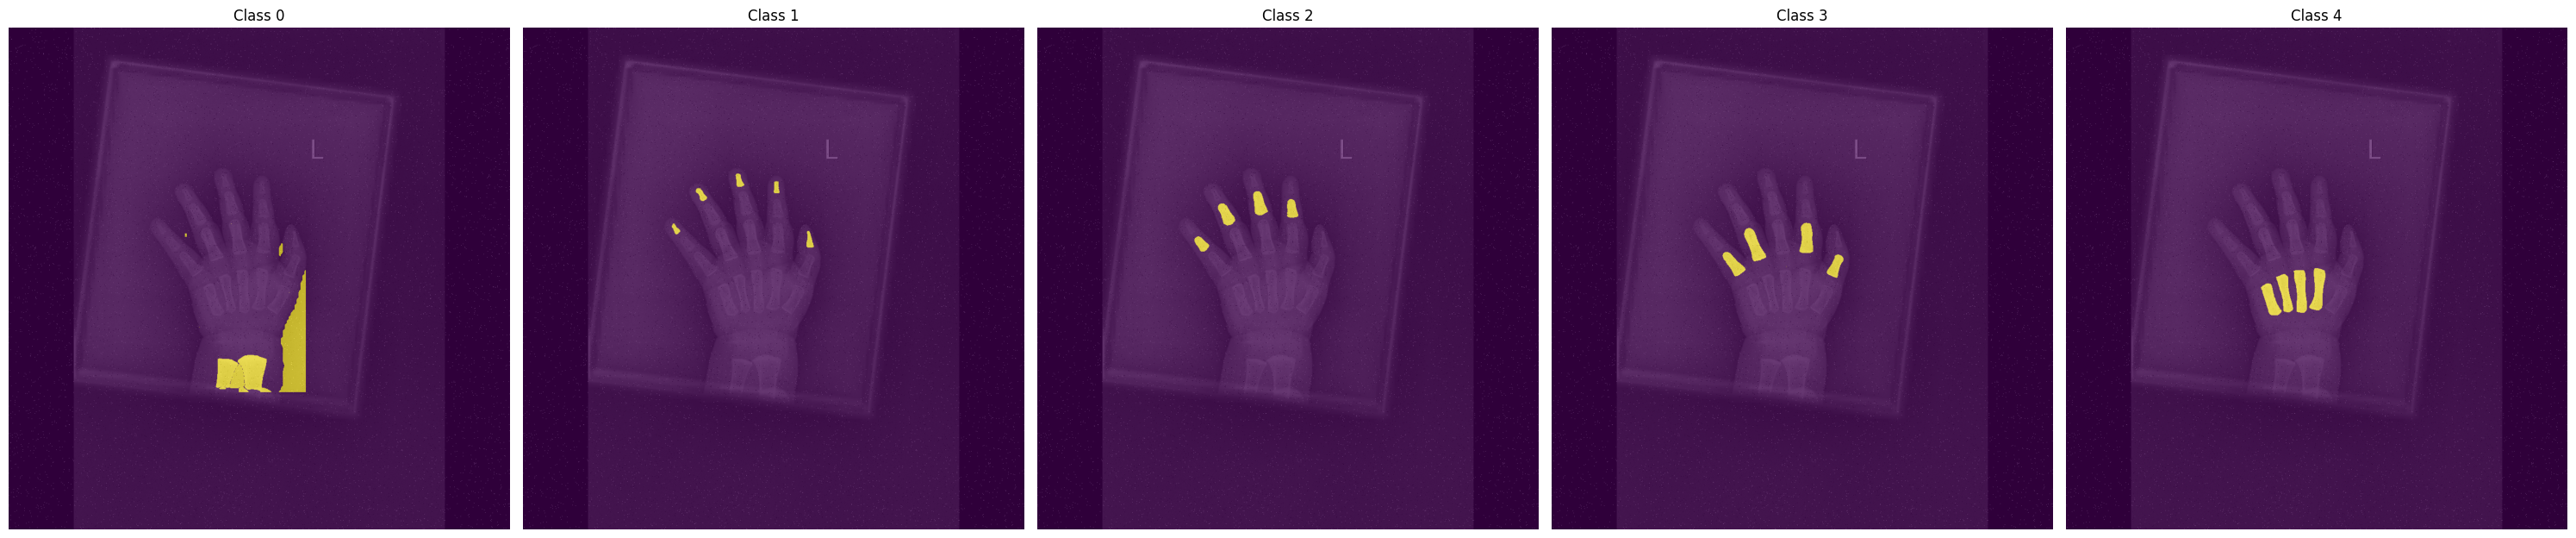

In [ ]:
''' Step2.8: And see the results'''

img_path = f'./PedVisionCode/test_data/input/{IMAGE_NAME}_{NOISE_TYPE}_N_lvl_{NOISE_RATE}.jpg'
noise_add.visualize_masks(img_path)


#### Noise + VFM modifcation


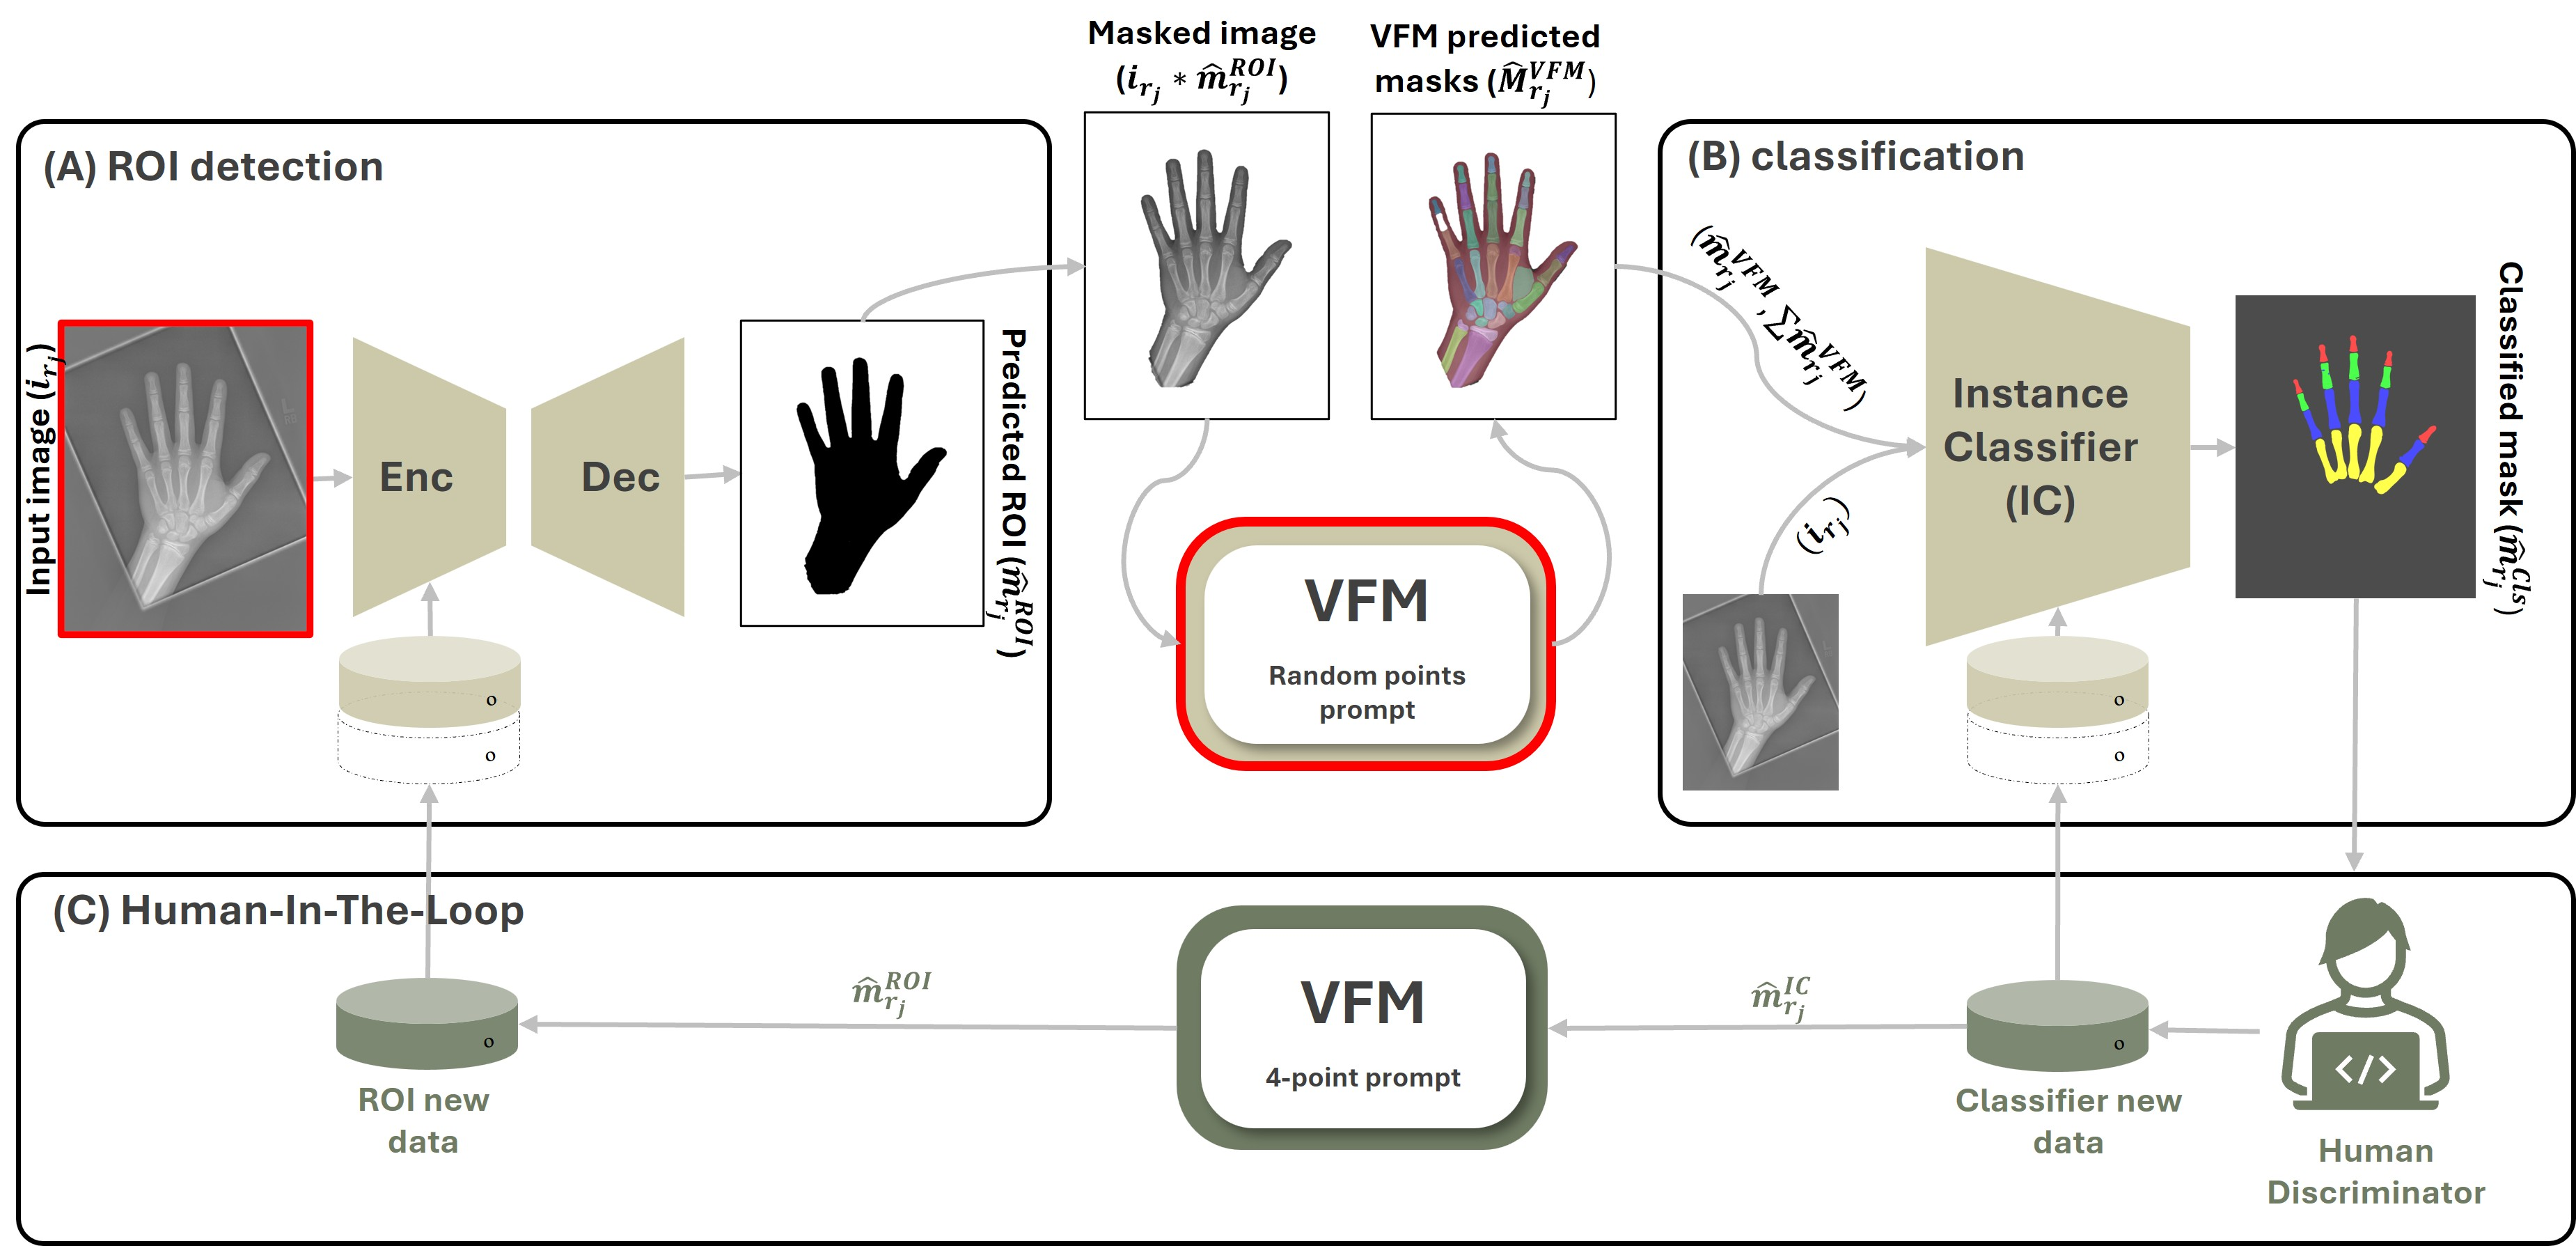

In [ ]:
''' Step2.9: Change the VFM parameters
By changing the pipeline configues, we might be able to improve the results

        - points_per_side (int or None): The number of points to be sampled
                    along one side of the image. The total number of points is
                    points_per_side**2. If None, 'point_grids' must provide explicit
                    point sampling. (Default: 32)
        - pred_iou_thresh (float): A filtering threshold in [0,1], using the
                    model's predicted mask quality.(Default: 0.88)
        - stability_score_thresh (float): A filtering threshold in [0,1], using
                    the stability of the mask under changes to the cutoff used to binarize
                    the model's mask predictions.(Default: 0.95)
        - crop_n_layers (int): If >0, mask prediction will be run again on
            crops of the image. Sets the number of layers to run, where each
            layer has 2**i_layer number of image crops.(Default: 1)
'''

!python PedVisionCode/main.py --test_model y\
--img_name {IMAGE_NAME}_{NOISE_TYPE}_N_lvl_{NOISE_RATE}\
--points_per_side=42\
# --crop_n_layers=1\
# --pred_iou_thresh=0.88\
# --stability_score_thresh=0.95\

Testing model...
100% 1/1 [00:29<00:00, 29.52s/it]


Visualizing masks for: 1998_salt_pepper_N_lvl_30


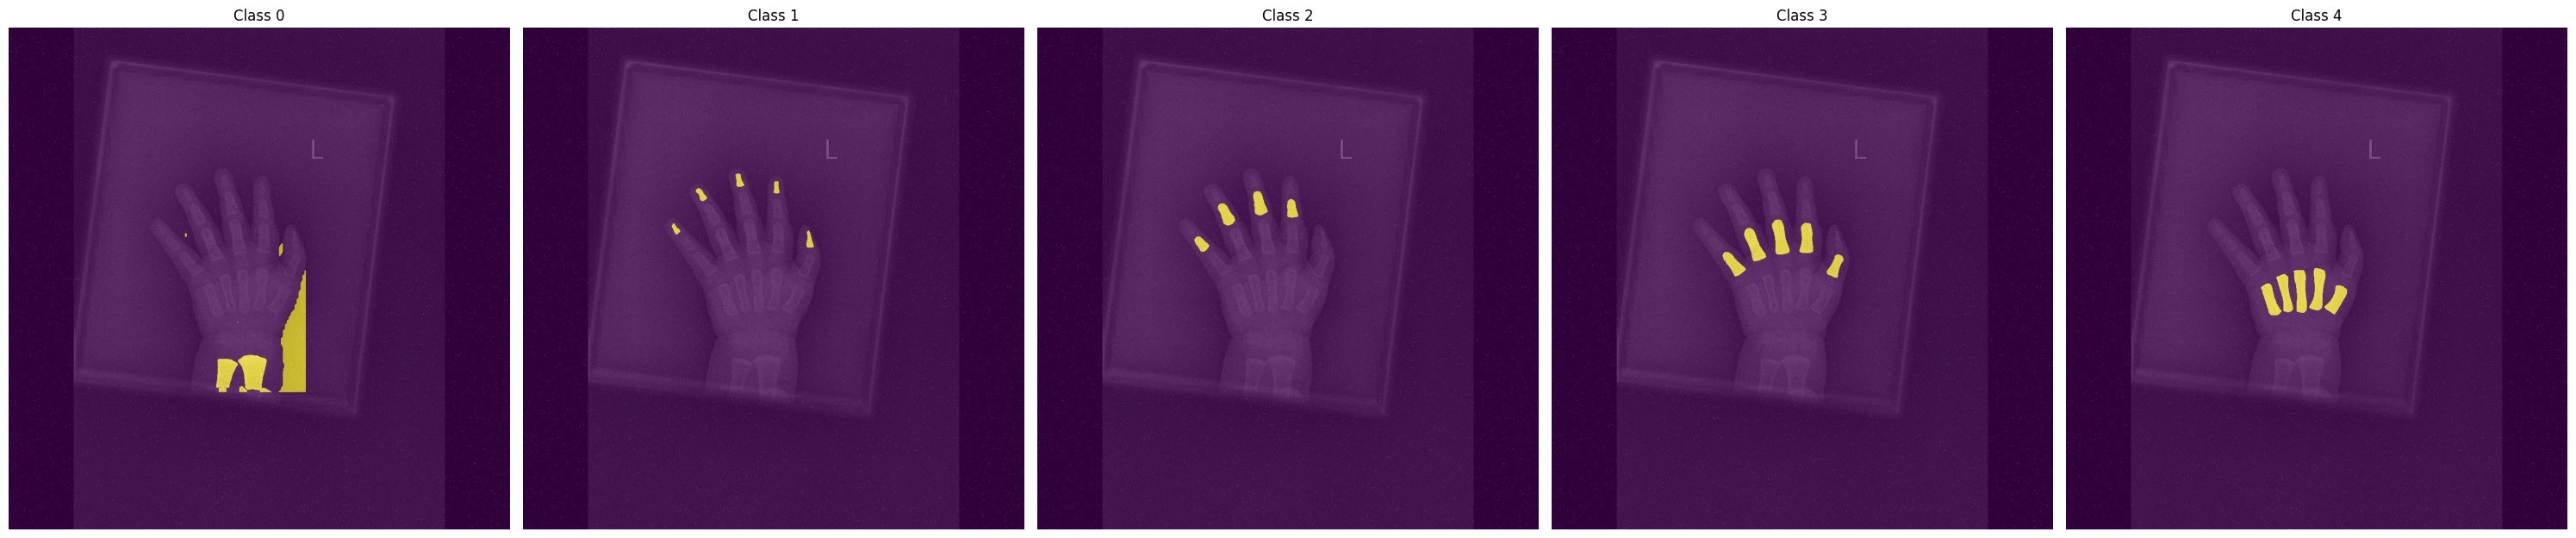

In [ ]:
'''Step 2.10: See the performance of the modified PedVision model on the noisy image'''

noise_add.visualize_masks(f'./PedVisionCode/test_data/input/{IMAGE_NAME}_{NOISE_TYPE}_N_lvl_{NOISE_RATE}.jpg')

### 3.Non-VFM based

In [ ]:
'''Step3.1: Let's initiate the test set for non-VFM based models.'''

from PedVisionCode.utils import non_vfm
from torch.utils.data import DataLoader
import torch

image_dir = "/content/PedVision/PedVisionCode/test_data/input/"
custom_transform = non_vfm.CustomTransformTest()
dataset_te = non_vfm.CustomDataset(image_dir, transform=custom_transform)
test_loader = DataLoader(dataset_te, batch_size=1, shuffle=True)


In [ ]:
'''Step2: Select one of the following models to test'''

# model_name = 'deeplab34'
# model_name = 'deeplab101'
# model_name = 'unet_res34'
# model_name = 'unet_res101'
# model_name = 'segformer_mitb0'
# model_name = 'segformer_mitb1'
# model_name = 'segformer_mitb2'
model_name = 'segformer_mitb3'

In [ ]:
'''Step3: Run this cell to donwload the model and initiate it'''

if model_name == 'deeplab34':
    !wget "https://www.dropbox.com/scl/fi/nw4vtzmlfxtjn0lu1l62m/DeepLabV3Plus_resnet34_best_model.pth?rlkey=qixdcwdps3gxrd253qdbflf3v&st=1wi8hwob&dl=1" -O PedVisionCode/saved_models/DeepLabV3Plus_resnet34_best_model.pth

elif model_name == 'deeplab101':
    !wget "https://www.dropbox.com/scl/fi/omef5qou8fo50nktwyqk6/Deeplapv3p_res101_best_model.pth?rlkey=i4y1uywekm4s6tfciv3wxywiw&st=oq5jyjkz&dl=1" -O PedVisionCode/saved_models/Deeplapv3p_res101_best_model.pth

elif model_name == 'unet_res34':
    !wget "https://www.dropbox.com/scl/fi/j375w7rjqx7x0w18c1t09/Unet_res34.pth?rlkey=epomx2uloprl71y0rh4go6h8j&st=j91wsim7&dl=1" -O PedVisionCode/saved_models/Unet_res34.pth

elif model_name == 'unet_res101':
    !wget "https://www.dropbox.com/scl/fi/jc1zod78qtm5pnjrvu77u/Unet_res101.pth?rlkey=5fgq6oqbr3f1q8nnecb77j7lf&st=n3hv56kl&dl=1" -O PedVisionCode/saved_models/Unet_res101.pth

elif model_name == 'segformer_mitb0':
    !wget "https://www.dropbox.com/scl/fi/tlowi0405ovrrs0vdz4ic/Segformer_mitb0.pth?rlkey=hagjaz2koa93afgrrvu56gkpn&st=t0lwm7jt&dl=1" -O PedVisionCode/saved_models/Segformer_mitb0.pth

elif model_name == 'segformer_mitb1':
    !wget "https://www.dropbox.com/scl/fi/nv0ra1xko2y8t4b1bt97c/Segformer_mitb1.pth?rlkey=yk7yrdtj878o8usof4qublv1m&st=xcead696&dl=1" -O PedVisionCode/saved_models/Segformer_mitb1.pth

elif model_name == 'segformer_mitb2':
    !wget "https://www.dropbox.com/scl/fi/5mf0fv4htb8vehcsfl6d3/Segformer_mitb2.pth?rlkey=f2df0pv4bo0a5v2zmpfvpanhd&st=wygqqi50&dl=1" -O PedVisionCode/saved_models/Segformer_mitb2.pth

elif model_name == 'segformer_mitb3':
    !wget "https://www.dropbox.com/scl/fi/07tggc1sy54oqwlv73evb/Segformer_mitb3.pth?rlkey=rc6nsw2j14fytkxdkjrispc36&st=kkla9ac7&dl=1" -O PedVisionCode/saved_models/Segformer_mitb3.pth

model = non_vfm.model_selection(model_name)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

--2025-07-02 09:56:18--  https://www.dropbox.com/scl/fi/07tggc1sy54oqwlv73evb/Segformer_mitb3.pth?rlkey=rc6nsw2j14fytkxdkjrispc36&st=kkla9ac7&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc12f961ba5a58d647e180850bb8.dl.dropboxusercontent.com/cd/0/inline/CsseCOezPORzte9Qhe9Keqe9Qhgv3jQeBsSJVGfsSxq_FTpe-2KTrl4OwzRMeQFm5kAiT1DHaLH4jzYtQOcsepw22lt1HSJPqKU9c5ZSNY0E6iUNYl6vl1DheAxZIDtwztxOoKLeUgAb3DdML3DlJGBH/file?dl=1# [following]
--2025-07-02 09:56:18--  https://uc12f961ba5a58d647e180850bb8.dl.dropboxusercontent.com/cd/0/inline/CsseCOezPORzte9Qhe9Keqe9Qhgv3jQeBsSJVGfsSxq_FTpe-2KTrl4OwzRMeQFm5kAiT1DHaLH4jzYtQOcsepw22lt1HSJPqKU9c5ZSNY0E6iUNYl6vl1DheAxZIDtwztxOoKLeUgAb3DdML3DlJGBH/file?dl=1
Resolving uc12f961ba5a58d647e180850bb8.dl.dropboxusercontent.com (uc12f961ba5a58d647e180850bb8.dl.dropboxuserco

Segformer(
  (encoder): MixVisionTransformerEncoder(
    (patch_embed1): OverlapPatchEmbed(
      (proj): Conv2d(1, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
      (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed2): OverlapPatchEmbed(
      (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed3): OverlapPatchEmbed(
      (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
    )
    (patch_embed4): OverlapPatchEmbed(
      (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    )
    (block1): Sequential(
      (0): Block(
        (norm1): LayerNorm((64,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (q): Linear(in_featur

In [ ]:
'''Step4: Predict the test set'''

custom_transform = non_vfm.CustomTransformTest()
dataset_te = non_vfm.CustomDataset(image_dir, transform=custom_transform)
test_loader = DataLoader(dataset_te, batch_size=1, shuffle=False)

outputs, names = non_vfm.test_model(model, test_loader, device)
print('\n')
for i in range(len(outputs)):
    print(i,'->', names[i])

100%|██████████| 10/10 [00:03<00:00,  3.17it/s]



0 -> 2428_salt_pepper_N_lvl_40.jpg
1 -> 1998_salt_pepper_N_lvl_30.jpg
2 -> 2428_gaussian_N_lvl_50.jpg
3 -> 2428_gaussian_N_lvl_30.jpg
4 -> 1473.jpg
5 -> 1998.jpg
6 -> 15553_salt_pepper_N_lvl_30.jpg
7 -> 2428_salt_pepper_N_lvl_35.jpg
8 -> 2428.jpg
9 -> 15553.jpg


1998_salt_pepper_N_lvl_30.jpg


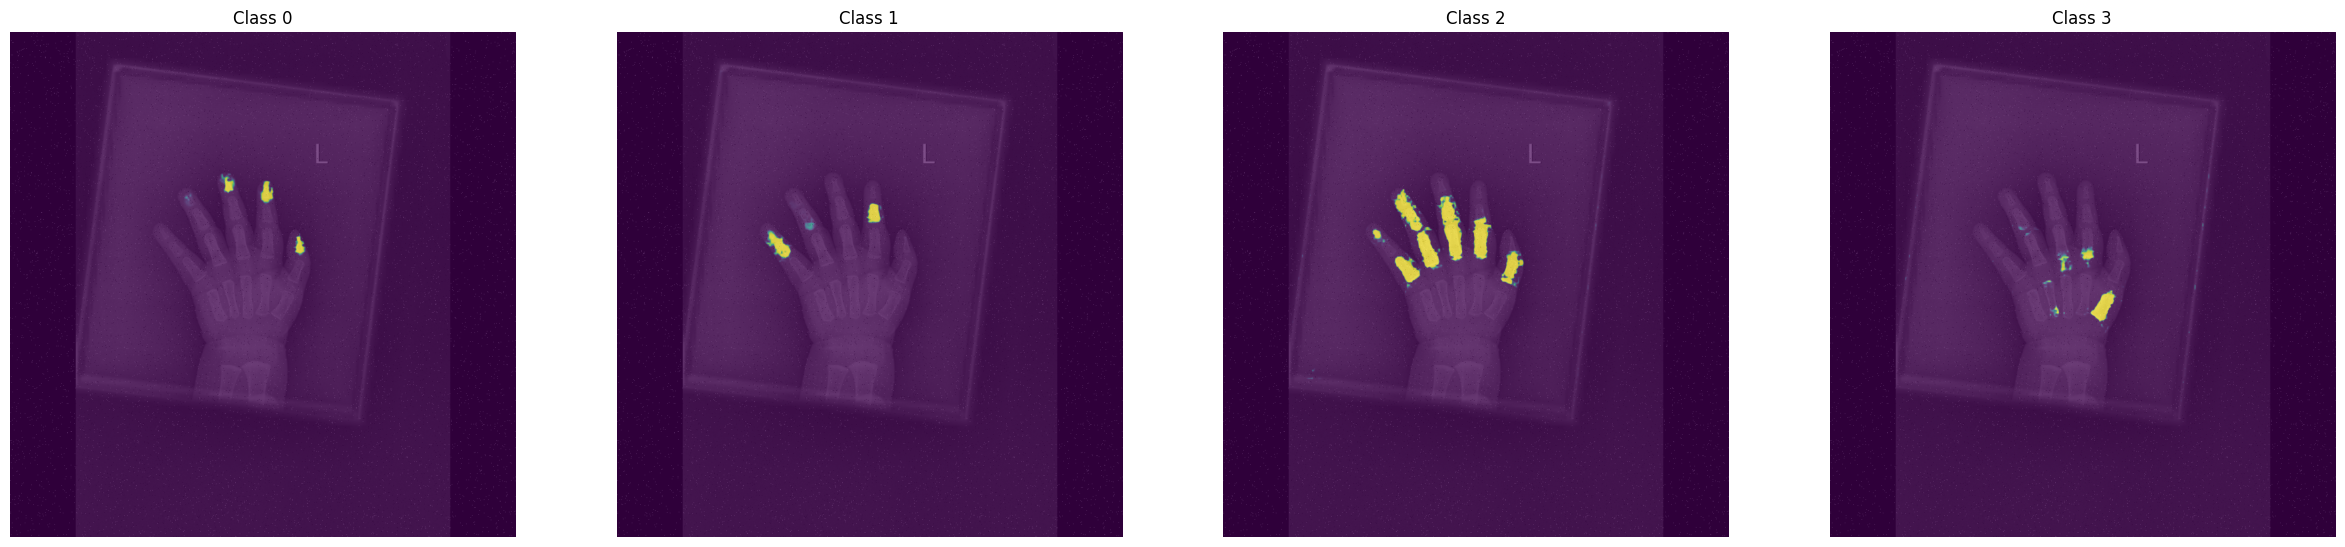

In [ ]:
'''Step5: See the results for different images by selecting case_num from previous cell'''

non_vfm.img_show(image_dir, names, outputs, case_num=1)